## Multiple Linear Regression

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

### Step_1 : Importing and Understanding Data

In [1]:
import pandas as pd

In [2]:
#import advertizing.csv 
advertising_multi=pd.read_csv('advertising.csv')

In [3]:
# looking at the first five rows
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#looking five the last rows 
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
# what type of values are stored in the columns?
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#let's look at the some statistical information about our dataframe
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Step_2: Visualizing Data

In [7]:
import matplotlib as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


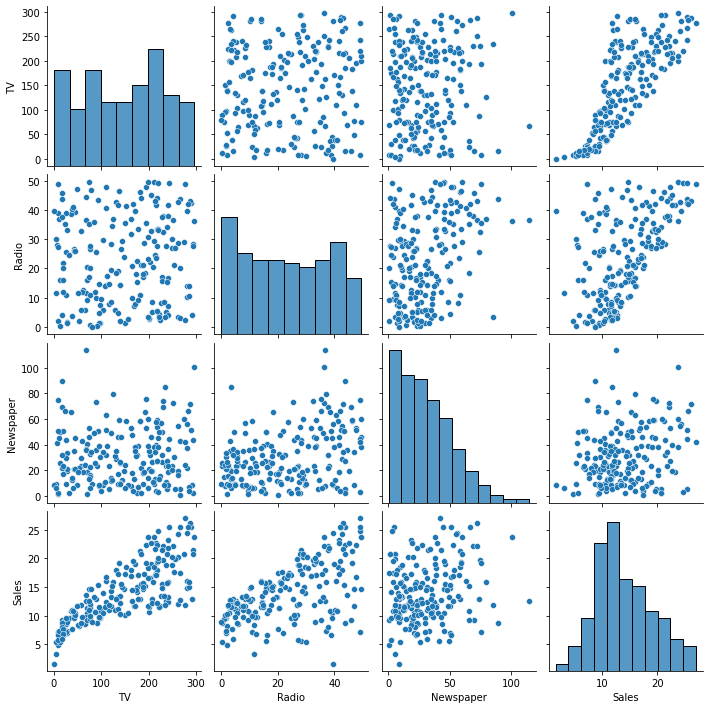

In [8]:
# let's plote a pair plot of all variables in our dataframe
sns.pairplot(advertising_multi)

c:\Users\zahir\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


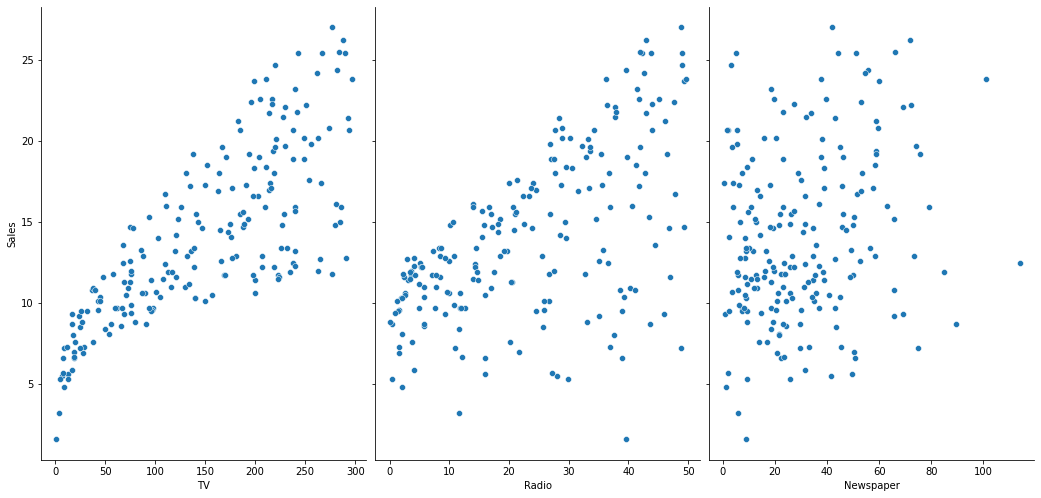

In [9]:
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7, kind='scatter')

Step_3: Splitting the Data for Training and Testing 

In [10]:
# Putting feature variable to X
X=advertising_multi[['TV','Radio','Newspaper']]

# Putting response variable  to Y
Y=advertising_multi['Sales']

In [11]:
# Random_State is the seed used by the random number generator. IT can be integer.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)

Step_4 : Performing Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Representing LinearRegression as LR(Creating LinearRegression Object)
lm=LinearRegression()

In [14]:
# fit the model to the training data 
lm.fit(X_train,Y_train)

LinearRegression()

Step_5: Model Evaluation 

In [15]:
# print the intercept
print(lm.intercept_)

2.652789668879496


In [16]:
# let's see the coefficient 
coeff_df=pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


From the above result we may infern that if TV price increase by 1 unit it will affect sales by 0.045 units

Step_6 : Predictions

In [17]:
# Making predictions using the model 
Y_pred=lm.predict(X_test)

Step_7: Calculating Error Terms

In [18]:
from sklearn.metrics import  mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
r_squared=r2_score(Y_test,Y_pred)

In [19]:
print("mean_squared_error :", mse)
print("r_squere_value :", r_squared)

mean_squared_error : 1.8506819941636972
r_squere_value : 0.9058622107532245


Optional Step : Checking for P-value using STATSMODEL

In [20]:
# pip install statsmodels 
# !pip install statsmodels
import statsmodels.api as sm
X_train_sm=X_train
# Unlike SKLern , statsmodels don't automatically fit a constant,
# so you need to use the methode sm.add_constant(X) in order to add a constant.
X_train_sm=sm.add_constant(X_train_sm)
# create a fitted model in one line 
lm_l=sm.OLS(Y_train,X_train_sm).fit()
# print the coefficients 
lm_l.params


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [21]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           9.97e-66
Time:                        09:54:24   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

From the above we can see that newspaperis is in significant 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<AxesSubplot:>

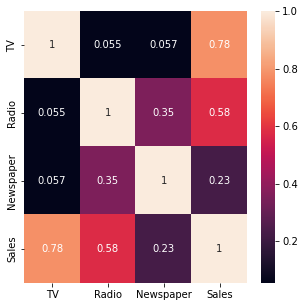

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising_multi.corr(),annot=True)

Step_8 : Implement the result and running the model again 

From the data above , you can conclude that Newspaper is insignificant.

In [24]:
# removing Newspaper  from our dataset 
X_train_new=X_train[['TV','Radio']]
X_test_new=X_test[['TV','Radio']]

In [25]:
# Model predictions
lm.fit(X_train_new,Y_train)

LinearRegression()

In [26]:
Y_pred_new=lm.predict(X_test_new)

Text(0, 0.5, 'Sales')

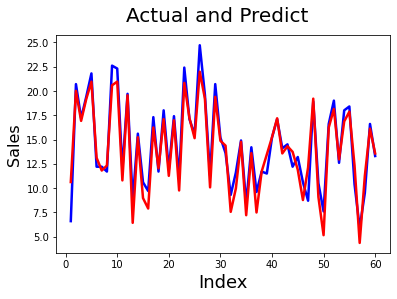

In [27]:
# Actual vs Predict 
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,Y_test,color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred,color="red", linewidth=2.5,linestyle="-")
fig.suptitle('Actual and Predict', fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=16)

Text(0, 0.5, 'ytest-yored')

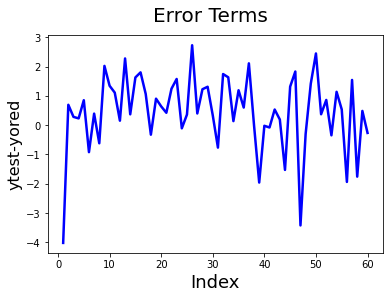

In [28]:
# Error terms
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,Y_test-Y_pred,color='blue',linewidth=2.5,linestyle='-')
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('ytest-yored',fontsize=16)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(Y_test, Y_pred_new)
r_squared=r2_score(Y_test,Y_pred_new
                   )

In [30]:
print('mean_squared_error :',mse)
print('r_squared_value :',r_squared)

mean_squared_error : 1.7847400520902814
r_squared_value : 0.9092164491718219


In [31]:
X_train_final=X_train_new
#Unlike SKlearn, statsmodels don't automatically fit a constant 
#so you need to use the method am.add_constant(X) in order to add constant
X_train_final=sm.add_constant(X_train_final)
# create a fitted model in one line 
lm_final=sm.OLS(Y_train,X_train_final).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.46e-67
Time:                        09:54:26   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

### Model Refinement Using RFE

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.

In [32]:
from sklearn.feature_selection import RFE
rfe=RFE(lm,2)
rfe=rfe.fit(X_train,Y_train)

c:\Users\zahir\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [33]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


## Simple Linear Regression: Newspaper(X) and Sales(Y)

In [42]:
import pandas as pd
import numpy as np
# Importing dateset
advertising_multi=pd.read_csv('advertising.csv')
x_news=advertising_multi['Newspaper']
y_news=advertising_multi['Sales']
# Data Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_news,y_news,train_size=0.7, random_state=110)


#Required only in the case of simple linear regression
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
# Fitting the model 
lm.fit(X_train,Y_train)
# making prediction 
Y_pred=lm.predict(X_test)

# Importing mean square error nd R square from sklearn library.
from sklearn.metrics import mean_squared_error,r2_score
# computing mean square error and R square value 
mse=mean_squared_error(Y_test,Y_pred)
r_squared=r2_score(Y_test,Y_pred)

# Printing mean square error and value

print('mean_squared_error :',mse)
print('r_squared_value :', r_squared) 

mean_squared_error : 23.84732008485191
r_squared_value : 0.08182413570736657


c:\Users\zahir\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
c:\Users\zahir\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
